***
<span style="color:#008385">

**15-448: Machine Learning in a Nutshell**, *CMU-Qatar* Spring'20

**Gianni A. Di Caro**, www.giannidicaro.com

<u>Disclaimer:</u> This notebook was prepared for teaching purposes. It can include material from different web sources. I'll happy to explicitly acknowledge a source if required. 
</span>
***

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Case-study:-the-diabetes-dataset-from-sklearn" data-toc-modified-id="Case-study:-the-diabetes-dataset-from-sklearn-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Case study: the diabetes dataset from <code>sklearn</code></a></span><ul class="toc-item"><li><span><a href="#Inspect-the-data" data-toc-modified-id="Inspect-the-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Inspect the data</a></span></li><li><span><a href="#Store-the-dataset-into-a-Pandas-DataFrame" data-toc-modified-id="Store-the-dataset-into-a-Pandas-DataFrame-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Store the dataset into a Pandas DataFrame</a></span></li><li><span><a href="#Aggregate-statistics-about-the-data" data-toc-modified-id="Aggregate-statistics-about-the-data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Aggregate statistics about the data</a></span></li><li><span><a href="#Issue:-we-can't-reconstruct-the-original-data!" data-toc-modified-id="Issue:-we-can't-reconstruct-the-original-data!-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Issue: we can't reconstruct the original data!</a></span></li></ul></li><li><span><a href="#Read-the-original-dataset,-unscaled-and-unnormalized" data-toc-modified-id="Read-the-original-dataset,-unscaled-and-unnormalized-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Read the original dataset, unscaled and unnormalized</a></span><ul class="toc-item"><li><span><a href="#Aggregate-statistics-(now-they-are-more-meaningful!)" data-toc-modified-id="Aggregate-statistics-(now-they-are-more-meaningful!)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Aggregate statistics (now they are more meaningful!)</a></span></li><li><span><a href="#Histogram-visualization" data-toc-modified-id="Histogram-visualization-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Histogram visualization</a></span></li><li><span><a href="#Apply-the-normalization-transform" data-toc-modified-id="Apply-the-normalization-transform-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Apply the normalization transform</a></span></li><li><span><a href="#Normalize-using-sklearn" data-toc-modified-id="Normalize-using-sklearn-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Normalize using <code>sklearn</code></a></span></li></ul></li><li><span><a href="#Missing-entries:-check-and-impute" data-toc-modified-id="Missing-entries:-check-and-impute-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Missing entries: check and impute</a></span><ul class="toc-item"><li><span><a href="#Drop-all-rows-with-at-least-one-missing-entry" data-toc-modified-id="Drop-all-rows-with-at-least-one-missing-entry-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Drop all rows with at least one missing entry</a></span></li><li><span><a href="#Keep-only-the-rows/columns-with-at-least-thresh-non-missing-values" data-toc-modified-id="Keep-only-the-rows/columns-with-at-least-thresh-non-missing-values-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Keep only the rows/columns with at least <code>thresh</code> non-missing values</a></span></li><li><span><a href="#Replace-with-an-arbitrary-value" data-toc-modified-id="Replace-with-an-arbitrary-value-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Replace with an arbitrary value</a></span></li><li><span><a href="#Replace-with-statistical-estimators" data-toc-modified-id="Replace-with-statistical-estimators-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Replace with statistical estimators</a></span><ul class="toc-item"><li><span><a href="#Fill-with-the-column-mean" data-toc-modified-id="Fill-with-the-column-mean-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>Fill with the column mean</a></span></li><li><span><a href="#Fill-with-the-column-median" data-toc-modified-id="Fill-with-the-column-median-3.4.2"><span class="toc-item-num">3.4.2&nbsp;&nbsp;</span>Fill with the column median</a></span></li><li><span><a href="#Fill-with-the-column-mode" data-toc-modified-id="Fill-with-the-column-mode-3.4.3"><span class="toc-item-num">3.4.3&nbsp;&nbsp;</span>Fill with the column mode</a></span></li></ul></li><li><span><a href="#Fill-with-time-series-approaches" data-toc-modified-id="Fill-with-time-series-approaches-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Fill with time-series approaches</a></span><ul class="toc-item"><li><span><a href="#Propagate-the-last-valid-observation-backward" data-toc-modified-id="Propagate-the-last-valid-observation-backward-3.5.1"><span class="toc-item-num">3.5.1&nbsp;&nbsp;</span>Propagate the last valid observation backward</a></span></li><li><span><a href="#Forward-propagate-the-last-valid-observation" data-toc-modified-id="Forward-propagate-the-last-valid-observation-3.5.2"><span class="toc-item-num">3.5.2&nbsp;&nbsp;</span>Forward-propagate the last valid observation</a></span></li><li><span><a href="#Interpolate" data-toc-modified-id="Interpolate-3.5.3"><span class="toc-item-num">3.5.3&nbsp;&nbsp;</span>Interpolate</a></span></li></ul></li></ul></li><li><span><a href="#Check-and-manage-outliers" data-toc-modified-id="Check-and-manage-outliers-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Check and manage outliers</a></span></li><li><span><a href="#Correlations-among-data" data-toc-modified-id="Correlations-among-data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Correlations among data</a></span></li></ul></div>

# Case study: the diabetes dataset from `sklearn`

In [1]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
targets = diabetes.target
features = diabetes.data

/Users/giannidicaro/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:17: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping, defaultdict


## Inspect the data

In [2]:
features.shape

(442, 10)

In [3]:
features

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [4]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [5]:
# data is organized into a Bunch data structure which is a dictionary
# 
print(diabetes['DESCR'])

Diabetes dataset

Notes
-----

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attributes:
    :Age:
    :Sex:
    :Body mass index:
    :Average blood pressure:
    :S1:
    :S2:
    :S3:
    :S4:
    :S5:
    :S6:

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani

In [6]:
feature_names = diabetes['feature_names']
feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

## Store the dataset into a Pandas DataFrame

In [7]:
import pandas as pd
import numpy as np

In [8]:
# first, add the features, with the feature names
diabetes_df = pd.DataFrame(features, columns=feature_names)

In [9]:
# then, add the targets, using a custom name 
diabetes_df['Progression index'] = targets

In [10]:
diabetes_df.round(4)  # display all numbers with at most 4 decimals
diabetes_df

age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017282 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081414  0.083740  0.027809  0.173816   

           s4        s5        s6  Progression index  
0   -0.002592  0.019908 -0.017646              151.0  
1   -0.039493 -0.068330 -0.092204               75.0  
2   -0.002592  0.002864 -0.025930              141.0  
3    0.034309  0.022692 -0.009362              206.0  
4   -0.002592 -0.031991 -0.046641              135.0  
..        ...       ...       ...                ...  
437 -0.002592  0.031193  0.007207              178.0  
438  0.034309 -0.018118  0.044485              104.0  
439 -0.011080 -0.046879  0.015491              132.0  
440  0.026560  0.044528 -0.025930              220.0  
441 -0.039493 -0.004220  0.003064               57.0  

[442 rows x 11 columns]

As it is said in DESCR all values in the datase have been **mean-centered** and **normalized**. 

While this is good for processing the data making date **units-free**, it makes hard to understand what the data are about.

The transformation for the entries $x_i$ of a  feature $x$ has been the following:

$$znorm(x_i) = \frac{x_i - \mu(x)}{\sigma(x)\cdot \sqrt{n}}$$
    
where $n$ is the total number of data records, $x_i$ is the $i$-th data entry for feature $x$, $\mu(x)$ is the mean over all values of feature $x$, and $\sigma(x)$ is the standard deviation over all values of $x$.

- The $z$ part of the transformation, $z(x_i) = \frac{x_i - \mu(x)}{\sigma(x)}$, makes the transformed entries being 
centered about the mean, such that each feature has **zero mean,** $\mu(z(x))=0$, and has standard deviation equal to 1.<br><p>

<span style="color:red; font-size:120%">Check the Notebook of the lecture on Outliers and Data scaling!
   
https://web2.qatar.cmu.edu/~gdicaro/15488/lectures/488-S20-11-Outliers_Scaling.ipynb
    </span>
    
- The further scaling by $\sqrt{n}$ doesn't affect the mean, but it makes the **standard deviation** of each feature becoming 
    $$\sigma(znorm(x)) = 1/\sqrt{n},$$  
    
  and the *feature vector* having **norm equal to 1**:  $\sum_{i=1}^n znorm(x_i)^2 = 1$.

We can check out these properties in the data

First, let's set the number of decimal digits when pandas print out things:

https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html

In [11]:
#pd.set_option('precision', 3)  # 3 decimal digits
pd.options.display.float_format = '{:.3f}'.format

## Aggregate statistics about the data

In [12]:
diabetes_df.mean()

age                  -0.000
sex                   0.000
bmi                  -0.000
bp                    0.000
s1                   -0.000
s2                    0.000
s3                   -0.000
s4                    0.000
s5                   -0.000
s6                   -0.000
Progression index   152.133
dtype: float64

In [13]:
diabetes_df.median()

age                   0.005
sex                  -0.045
bmi                  -0.007
bp                   -0.006
s1                   -0.004
s2                   -0.004
s3                   -0.007
s4                   -0.003
s5                   -0.002
s6                   -0.001
Progression index   140.500
dtype: float64

In [14]:
diabetes_df.std()

age                  0.048
sex                  0.048
bmi                  0.048
bp                   0.048
s1                   0.048
s2                   0.048
s3                   0.048
s4                   0.048
s5                   0.048
s6                   0.048
Progression index   77.093
dtype: float64

Which is the same as $1/\sqrt{n}$:

In [15]:
(1/np.sqrt(diabetes_df.count()) )

age                 0.048
sex                 0.048
bmi                 0.048
bp                  0.048
s1                  0.048
s2                  0.048
s3                  0.048
s4                  0.048
s5                  0.048
s6                  0.048
Progression index   0.048
dtype: float64

In [16]:
import numpy as np
import matplotlib.pyplot as plt

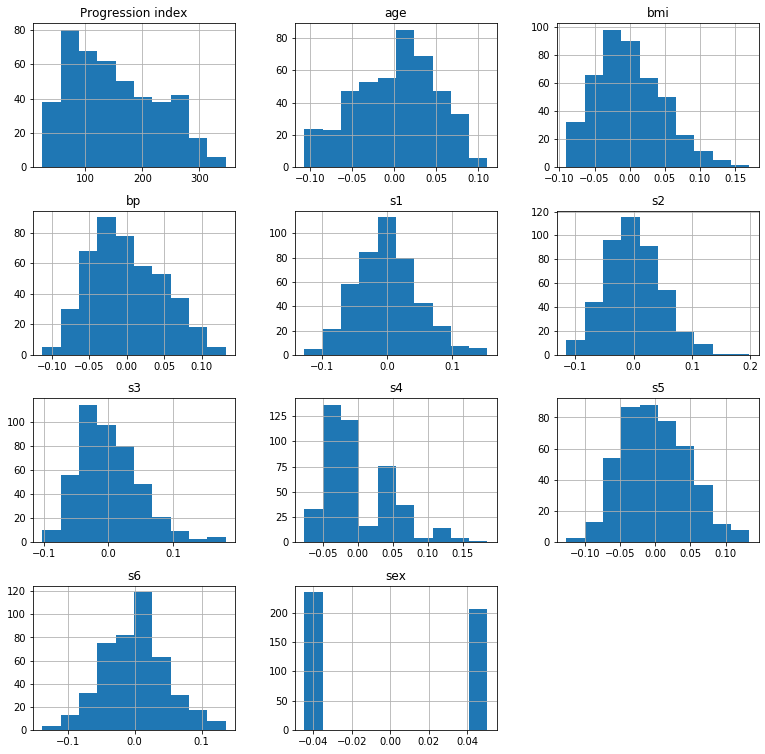

In [17]:
# This function calls matplotlib.pyplot.hist(), on each series in 
# the DataFrame, resulting in one histogram per column.
#
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html

diabetes_df.hist(bins=10, figsize=(13,13))
plt.show()

## Issue: we can't reconstruct the original data!

Since we don't have the original data, we don't know the $\mu(x)$ and $\sigma(x)$ that have been used in $znorm(x_i) = \frac{x_i - \mu(x)}{\sigma(x)\cdot \sqrt{n}},$ such that we can't reconstruct the original $x_i$ data.

Note that when using the `preprocessing` module in `sklearn` every transformation can be <u>stored</u> in a **transform object**, such that the same transformation can be applied to other data, or can be reversed!

In this case we don't have access to the transform object, such that we have to find the original data on the Internet using the URL in the DESCR  field :-)

# Read the original dataset, unscaled and unnormalized

In [18]:
diabetes_orig = pd.read_csv('../datasets/diabetes.tsv', sep='\t')
diabetes_orig

AGE  SEX    BMI      BP   S1      S2     S3    S4    S5   S6    Y
0     59    2 32.100 101.000  157  93.200 38.000 4.000 4.860   87  151
1     48    1 21.600  87.000  183 103.200 70.000 3.000 3.892   69   75
2     72    2 30.500  93.000  156  93.600 41.000 4.000 4.673   85  141
3     24    1 25.300  84.000  198 131.400 40.000 5.000 4.890   89  206
4     50    1 23.000 101.000  192 125.400 52.000 4.000 4.290   80  135
..   ...  ...    ...     ...  ...     ...    ...   ...   ...  ...  ...
437   60    2 28.200 112.000  185 113.800 42.000 4.000 4.984   93  178
438   47    2 24.900  75.000  225 166.000 42.000 5.000 4.443  102  104
439   60    2 24.900  99.670  162 106.600 43.000 3.770 4.127   95  132
440   36    1 30.000  95.000  201 125.200 42.000 4.790 5.130   85  220
441   36    1 19.600  71.000  250 133.200 97.000 3.000 4.595   92   57

[442 rows x 11 columns]

## Aggregate statistics (now they are more meaningful!)

In [19]:
diabetes_orig.mean()

AGE    48.518
SEX     1.468
BMI    26.376
BP     94.647
S1    189.140
S2    115.439
S3     49.788
S4      4.070
S5      4.641
S6     91.260
Y     152.133
dtype: float64

In [20]:
diabetes_orig.median()

AGE    50.000
SEX     1.000
BMI    25.700
BP     93.000
S1    186.000
S2    113.000
S3     48.000
S4      4.000
S5      4.620
S6     91.000
Y     140.500
dtype: float64

In [21]:
diabetes_orig.quantile(0.75)

AGE    59.000
SEX     2.000
BMI    29.275
BP    105.000
S1    209.750
S2    134.500
S3     57.750
S4      5.000
S5      4.997
S6     98.000
Y     211.500
Name: 0.75, dtype: float64

In [22]:
diabetes_orig.std()

AGE   13.109
SEX    0.500
BMI    4.418
BP    13.831
S1    34.608
S2    30.413
S3    12.934
S4     1.290
S5     0.522
S6    11.496
Y     77.093
dtype: float64

In [23]:
diabetes_orig.count()

AGE    442
SEX    442
BMI    442
BP     442
S1     442
S2     442
S3     442
S4     442
S5     442
S6     442
Y      442
dtype: int64

In [24]:
diabetes_orig.describe()

AGE     SEX     BMI      BP      S1      S2      S3      S4      S5  \
count 442.000 442.000 442.000 442.000 442.000 442.000 442.000 442.000 442.000   
mean   48.518   1.468  26.376  94.647 189.140 115.439  49.788   4.070   4.641   
std    13.109   0.500   4.418  13.831  34.608  30.413  12.934   1.290   0.522   
min    19.000   1.000  18.000  62.000  97.000  41.600  22.000   2.000   3.258   
25%    38.250   1.000  23.200  84.000 164.250  96.050  40.250   3.000   4.277   
50%    50.000   1.000  25.700  93.000 186.000 113.000  48.000   4.000   4.620   
75%    59.000   2.000  29.275 105.000 209.750 134.500  57.750   5.000   4.997   
max    79.000   2.000  42.200 133.000 301.000 242.400  99.000   9.090   6.107   

           S6       Y  
count 442.000 442.000  
mean   91.260 152.133  
std    11.496  77.093  
min    58.000  25.000  
25%    83.250  87.000  
50%    91.000 140.500  
75%    98.000 211.500  
max   124.000 346.000

## Histogram visualization

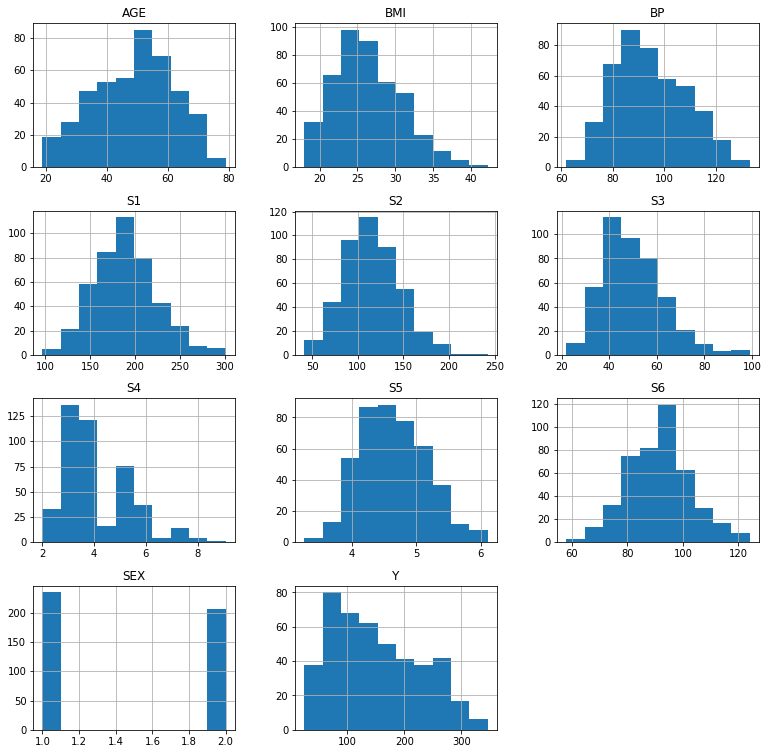

In [25]:
diabetes_orig.hist(bins=10, figsize=(13,13))
plt.show()

## Apply the normalization transform

Let's make the exercise to transform the data to the **normalized** form!

In [26]:
# this is the normalization applied to center and rescale the data
# first apply the z-trasnform
# then, normalize to unit vector
#
def center_and_normalize(df):
    return (df - df.mean()) / (df.std() * np.sqrt(df.count())) 

center_and_normalize(diabetes_orig)

AGE    SEX    BMI     BP     S1     S2     S3     S4     S5     S6  \
0    0.038  0.051  0.062  0.022 -0.044 -0.035 -0.043 -0.003  0.020 -0.018   
1   -0.002 -0.045 -0.051 -0.026 -0.008 -0.019  0.074 -0.039 -0.068 -0.092   
2    0.085  0.051  0.044 -0.006 -0.046 -0.034 -0.032 -0.003  0.003 -0.026   
3   -0.089 -0.045 -0.012 -0.037  0.012  0.025 -0.036  0.034  0.023 -0.009   
4    0.005 -0.045 -0.036  0.022  0.004  0.016  0.008 -0.003 -0.032 -0.047   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
437  0.042  0.051  0.020  0.060 -0.006 -0.003 -0.029 -0.003  0.031  0.007   
438 -0.006  0.051 -0.016 -0.068  0.049  0.079 -0.029  0.034 -0.018  0.044   
439  0.042  0.051 -0.016  0.017 -0.037 -0.014 -0.025 -0.011 -0.047  0.015   
440 -0.045 -0.045  0.039  0.001  0.016  0.015 -0.029  0.027  0.044 -0.026   
441 -0.045 -0.045 -0.073 -0.081  0.084  0.028  0.174 -0.039 -0.004  0.003   

         Y  
0   -0.001  
1   -0.048  
2   -0.007  
3    0.033  
4   -0.011  
..     ...  
437  0.016  
438 -0.030  
439 -0.012  
440  0.042  
441 -0.059  

[442 rows x 11 columns]

## Normalize using `sklearn`

The same result can be obatined by using `sklearn`

In [27]:
from sklearn import preprocessing

In [28]:
# z-transform the data
#
z = preprocessing.scale(diabetes_orig)
z

array([[ 0.80050009,  1.06548848,  1.29708846, ...,  0.41853093,
        -0.37098854, -0.01471948],
       [-0.03956713, -0.93853666, -1.08218016, ..., -1.43658851,
        -1.93847913, -1.00165882],
       [ 1.79330681,  1.06548848,  0.93453324, ...,  0.06015558,
        -0.54515416, -0.14457991],
       ...,
       [ 0.87686984,  1.06548848, -0.33441002, ..., -0.98564884,
         0.32567395, -0.26145431],
       [-0.9560041 , -0.93853666,  0.82123474, ...,  0.93616291,
        -0.54515416,  0.88131756],
       [-0.9560041 , -0.93853666, -1.53537419, ..., -0.08875225,
         0.06442552, -1.23540761]])

In [29]:
# normalize the z-transformed data, column-wise, by setting axis=0
# makes all the vectors having unit-norm
#
z_n = preprocessing.normalize(z, norm='l2', axis=0)
z_n

array([[ 0.03807591,  0.05068012,  0.06169621, ...,  0.01990749,
        -0.01764613, -0.00070013],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.06833155,
        -0.09220405, -0.04764405],
       [ 0.08529891,  0.05068012,  0.04445121, ...,  0.00286131,
        -0.02593034, -0.00687697],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.04688253,
         0.01549073, -0.01243611],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.04452873,
        -0.02593034,  0.04192   ],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.00422151,
         0.00306441, -0.05876235]])

In [30]:
# check that each feature vector has unit L2 norm
#
np.sum(z_n[:,0]**2)

0.9999999999999996

# Missing entries: check and impute

So far we had no issues for missing entries, but pandas are robust to missing data!

Let's (re)read the file with diabetes data from a *corrupted* source:

In [31]:
diabetes_orig = pd.read_csv('../datasets/diabetes2.tsv', sep='\t')
diabetes_orig

AGE  SEX    BMI      BP   S1      S2     S3    S4    S5   S6       Y
0     59    2 32.100 101.000  157  93.200 38.000 4.000 4.860   87 151.000
1     48    1 21.600  87.000  183 103.200 70.000 3.000 3.892   69  75.000
2     72    2 30.500  93.000  156  93.600 41.000 4.000 4.673   85 141.000
3     24    1 25.300  84.000  198 131.400 40.000 5.000 4.890   89 206.000
4     50    1 23.000 101.000  192 125.400 52.000 4.000 4.290   80 135.000
..   ...  ...    ...     ...  ...     ...    ...   ...   ...  ...     ...
437   60    2 28.200 112.000  185 113.800 42.000 4.000 4.984   93 178.000
438   47    2 24.900  75.000  225 166.000 42.000 5.000 4.443  102 104.000
439   60    2 24.900  99.670  162 106.600 43.000 3.770 4.127   95 132.000
440   36    1 30.000  95.000  201 125.200 42.000 4.790 5.130   85 220.000
441   36    1 19.600  71.000  250 133.200 97.000 3.000 4.595   92  57.000

[442 rows x 11 columns]

In [32]:
# skelearn dataset: no missing entries
total_nan = np.sum(np.sum(diabetes_df.isnull()))
print('Total number of non-numeric entries: {}'.format(total_nan))

Total number of non-numeric entries: 0


In [33]:
# corrupted csv dataset: missing entries!
total_nan = np.sum(np.sum(diabetes_orig.isnull()))
print('Total non-numeric entries: {}'.format(total_nan))


Total non-numeric entries: 3


The dataset has missing values issues, that need to be fixed according to some **imputation strategy.** 

A nice set of examples of using pandas' methods for dealing with missing data:
https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/

## Drop all rows with at least one missing entry

In [34]:
df = diabetes_orig.dropna(axis=0, how='any')

In [35]:
print('Total nan: {}, rows {}, cols {}'.format(np.sum(np.sum(df.isnull())), 
          df.shape[0], df.shape[1]))
print('Total nan: {}, rows {}, cols {}'.format(np.sum(np.sum(diabetes_orig.isnull())),
         diabetes_orig.shape[0], diabetes_orig.shape[1]))

Total nan: 0, rows 439, cols 11
Total nan: 3, rows 442, cols 11


## Keep only the rows/columns with at least `thresh` non-missing values

Drop all row/columns with less than $n$ valid entries

In [36]:
# keep only the columns with at least thresh entries non null
df = diabetes_orig.dropna(axis=1, thresh=2)

In [37]:
print('Total nan: {}, rows {}, cols {}'.format(np.sum(np.sum(df.isnull())), 
          df.shape[0], df.shape[1]))
print('Total nan: {}, rows {}, cols {}'.format(np.sum(np.sum(diabetes_orig.isnull())),
         diabetes_orig.shape[0], diabetes_orig.shape[1]))

Total nan: 3, rows 442, cols 11
Total nan: 3, rows 442, cols 11


Nothing changed, since the changing threshold was never reached

In [38]:
df = diabetes_orig.dropna(axis=1, how='any')

In [39]:
print('Total nan: {}, rows {}, cols {}'.format(np.sum(np.sum(df.isnull())), 
          df.shape[0], df.shape[1]))
print('Total nan: {}, rows {}, cols {}'.format(np.sum(np.sum(diabetes_orig.isnull())),
         diabetes_orig.shape[0], diabetes_orig.shape[1]))

Total nan: 0, rows 442, cols 8
Total nan: 3, rows 442, cols 11


## Replace with an arbitrary value

In [40]:
df = diabetes_orig.replace(to_replace = np.nan, value = -99)  

We can check if the replacing value, -99 in this case, is now present in the data frame.

In [41]:
df.eq(-99).any(axis=0)

#Pandas' any() method checks whether any value in the caller object 
#(Dataframe or series) is not 0, and returns True for that. 
#If all values are 0, it will return False.

AGE    False
SEX    False
BMI    False
BP      True
S1     False
S2     False
S3     False
S4      True
S5     False
S6     False
Y       True
dtype: bool

In [42]:
df.eq(-99).any(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
437    False
438    False
439    False
440    False
441    False
Length: 442, dtype: bool

In [43]:
df[df.eq(-99).any(1)]

AGE  SEX    BMI      BP   S1      S2     S3      S4    S5  S6       Y
15   34    2 24.700 118.000  254 184.200 39.000   7.000 5.037  81 -99.000
18   38    1 25.400  84.000  162 103.000 42.000 -99.000 4.443  87  97.000
26   19    1 19.200 -99.000  124  54.000 57.000   2.000 4.174  90 137.000

## Replace with statistical estimators

### Fill with the column mean

In [44]:
df = diabetes_orig.fillna(diabetes_orig.mean())

In [45]:
diabetes_orig.mean()

AGE    48.518
SEX     1.468
BMI    26.376
BP     94.664
S1    189.140
S2    115.439
S3     49.788
S4      4.070
S5      4.641
S6     91.260
Y     152.091
dtype: float64

For the 15 data row, the value of the `Y` column was missing. Let's check that the value is now what we expect (i.e., -99). 

We will make the check on the same date entry for all the other imputation strategies below. 

In [46]:
df.iloc[15, :]

AGE    34.000
SEX     2.000
BMI    24.700
BP    118.000
S1    254.000
S2    184.200
S3     39.000
S4      7.000
S5      5.037
S6     81.000
Y     152.091
Name: 15, dtype: float64

Replacements can also be done **in-place**.

In [47]:
df = diabetes_orig.copy()
df.fillna(df.mean(), inplace=True)

In [48]:
df.iloc[15, :]

AGE    34.000
SEX     2.000
BMI    24.700
BP    118.000
S1    254.000
S2    184.200
S3     39.000
S4      7.000
S5      5.037
S6     81.000
Y     152.091
Name: 15, dtype: float64

### Fill with the column median

In [49]:
df = diabetes_orig.fillna(diabetes_orig.median())

In [50]:
diabetes_orig.median()

AGE    50.000
SEX     1.000
BMI    25.700
BP     93.000
S1    186.000
S2    113.000
S3     48.000
S4      4.000
S5      4.620
S6     91.000
Y     140.000
dtype: float64

In [51]:
df.iloc[15, :]

AGE    34.000
SEX     2.000
BMI    24.700
BP    118.000
S1    254.000
S2    184.200
S3     39.000
S4      7.000
S5      5.037
S6     81.000
Y     140.000
Name: 15, dtype: float64

### Fill with the column mode

In [52]:
df = diabetes_orig.fillna(diabetes_orig.mode())

In [53]:
diabetes_orig.mode(axis=0, dropna=True)

AGE   SEX    BMI     BP   S1      S2     S3    S4    S5     S6       Y
0 53.000 1.000 23.500 83.000  162 114.800 46.000 3.000 4.443 92.000  72.000
1    nan   nan 24.100 93.000  184 125.800    nan   nan   nan    nan 200.000

The `mode()` function shows all the mode(s) of a column (or a row, depending on the selected axis). If there are multiple modes (i.e., multiple values with the same highest number of presences), they are all displayed, over multiple rows. If for a column there's only one mode, the values on the other result rows are indicated as `nan`.

In [54]:
# verify that for Y col, 72 and 200 appear the same number of times
print(np.sum(diabetes_orig['Y'].eq(72)), np.sum(diabetes_orig['Y'].eq(200)))

6 6


## Fill with time-series approaches

### Propagate the last valid observation backward

In [55]:
df = diabetes_orig.fillna(method='backfill')

In [56]:
df.iloc[14:17, :]

AGE  SEX    BMI      BP   S1      S2     S3    S4    S5  S6       Y
14   61    1 24.000  91.000  202 115.400 72.000 3.000 4.290  73 118.000
15   34    2 24.700 118.000  254 184.200 39.000 7.000 5.037  81 166.000
16   47    1 30.300 109.000  207 100.200 70.000 3.000 5.215  98 166.000

In [57]:
diabetes_orig.iloc[14:17, :]

AGE  SEX    BMI      BP   S1      S2     S3    S4    S5  S6       Y
14   61    1 24.000  91.000  202 115.400 72.000 3.000 4.290  73 118.000
15   34    2 24.700 118.000  254 184.200 39.000 7.000 5.037  81     nan
16   47    1 30.300 109.000  207 100.200 70.000 3.000 5.215  98 166.000

### Forward-propagate the last valid observation 

In [58]:
df = diabetes_orig.fillna(method='ffill')

In [59]:
df.iloc[14:17, :]

AGE  SEX    BMI      BP   S1      S2     S3    S4    S5  S6       Y
14   61    1 24.000  91.000  202 115.400 72.000 3.000 4.290  73 118.000
15   34    2 24.700 118.000  254 184.200 39.000 7.000 5.037  81 118.000
16   47    1 30.300 109.000  207 100.200 70.000 3.000 5.215  98 166.000

### Interpolate

In [60]:
df = diabetes_orig.interpolate(method='linear')

In [61]:
df.iloc[14:17, :]

AGE  SEX    BMI      BP   S1      S2     S3    S4    S5  S6       Y
14   61    1 24.000  91.000  202 115.400 72.000 3.000 4.290  73 118.000
15   34    2 24.700 118.000  254 184.200 39.000 7.000 5.037  81 142.000
16   47    1 30.300 109.000  207 100.200 70.000 3.000 5.215  98 166.000

In [62]:
# simple linear interpolation
(118 + 166) / 2

# A number of different interpolation options
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html?highlight=interpolate#pandas.DataFrame.interpolate

142.0

# Check and manage outliers

Are **outliers** present in the data?

We can use the methods from the last lecture to check it out!

Let's use the z-score: if any of the features have a z-score outside of the bounds of 3$\sigma$, the corresponding data entry will be tagged as containing an outlier. 

Indeed, this is a very simplified way to identify outliers in a multivariate setting.

In [63]:
from scipy import stats

diabetes_orig = pd.read_csv('../datasets/diabetes.tsv', sep='\t')

features = diabetes_orig.iloc[:, 0:-1]

z = stats.zscore(features)
z

array([[ 0.80050009,  1.06548848,  1.29708846, ..., -0.05449919,
         0.41853093, -0.37098854],
       [-0.03956713, -0.93853666, -1.08218016, ..., -0.83030083,
        -1.43658851, -1.93847913],
       [ 1.79330681,  1.06548848,  0.93453324, ..., -0.05449919,
         0.06015558, -0.54515416],
       ...,
       [ 0.87686984,  1.06548848, -0.33441002, ..., -0.23293356,
        -0.98564884,  0.32567395],
       [-0.9560041 , -0.93853666,  0.82123474, ...,  0.55838411,
         0.93616291, -0.54515416],
       [-0.9560041 , -0.93853666, -1.53537419, ..., -0.83030083,
        -0.08875225,  0.06442552]])

In [64]:
# just a double check that stats.zscore() does the job :-)
def z_transform(df):
    return (df - df.mean()) / df.std()

z_transform(features)

AGE    SEX    BMI     BP     S1     S2     S3     S4     S5     S6
0    0.800  1.064  1.296  0.459 -0.929 -0.731 -0.911 -0.054  0.418 -0.371
1   -0.040 -0.937 -1.081 -0.553 -0.177 -0.402  1.563 -0.829 -1.435 -1.936
2    1.791  1.064  0.933 -0.119 -0.958 -0.718 -0.679 -0.054  0.060 -0.545
3   -1.870 -0.937 -0.243 -0.770  0.256  0.525 -0.757  0.720  0.476 -0.197
4    0.113 -0.937 -0.764  0.459  0.083  0.328  0.171 -0.054 -0.672 -0.979
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...
437  0.876  1.064  0.413  1.255 -0.120 -0.054 -0.602 -0.054  0.655  0.151
438 -0.116  1.064 -0.334 -1.420  1.036  1.662 -0.602  0.720 -0.380  0.934
439  0.876  1.064 -0.334  0.363 -0.784 -0.291 -0.525 -0.233 -0.985  0.325
440 -0.955 -0.937  0.820  0.026  0.343  0.321 -0.602  0.558  0.935 -0.545
441 -0.955 -0.937 -1.534 -1.710  1.759  0.584  3.650 -0.829 -0.089  0.064

[442 rows x 10 columns]

Spot and get the data examples with outlier features values:

In [65]:
outliers = features[((z > 3) | (z < -3))]

print(outliers, '\n', outliers.shape)

     AGE  SEX    BMI      BP   S1      S2     S3    S4    S5   S6
58    60    1 20.400 105.000  198  78.400 99.000 2.000 4.635   79
123   50    2 29.600  94.330  300 242.400 33.000 9.090 4.812  109
123   50    2 29.600  94.330  300 242.400 33.000 9.090 4.812  109
123   50    2 29.600  94.330  300 242.400 33.000 9.090 4.812  109
216   52    2 29.700 109.000  228 162.800 31.000 8.000 5.142  103
230   38    2 33.000  78.000  301 215.000 50.000 6.020 5.193  108
230   38    2 33.000  78.000  301 215.000 50.000 6.020 5.193  108
256   35    1 41.300  81.000  168 102.800 37.000 5.000 4.949   94
260   60    1 25.600  78.000  195  95.400 91.000 2.000 3.761   87
261   62    1 22.500 125.000  215  99.000 98.000 2.000 4.500   95
269   51    1 23.400  87.000  220 108.800 93.000 2.000 4.511   82
322   55    2 32.100 112.670  207  92.400 25.000 8.280 6.105  111
336   43    1 34.300  84.000  256 172.600 33.000 8.000 5.529  104
367   46    2 42.200  99.000  211 137.000 44.000 5.000 5.011   99
441   36  

Let's use the interquartile range.

In [66]:
# calculate interquartile range 

q25, q75 = features.quantile(0.25), features.quantile(0.75)

iqr = q75 - q25
print('IQRs:\n{}\n'.format(iqr))

# calculate the cut-off for the outliers
cut_off = iqr * 1.0
print('Cut-off:\n{}\n'.format(cut_off))

lower, upper = q25 - cut_off, q75 + cut_off
print('\nLower cut-offs:\n{}\n'
      '\nUpper cut-offs:\n{}'.format(lower, upper))

# identify outliers
outliers = features[ (features < lower) | (features > upper) ]

np.set_printoptions(precision=3)
print('\n{} outliers have been found'
      ' using IQR cut-offs'.format(np.sum(outliers.count())))

#print(outliers[0:50])

IQRs:
AGE   20.750
SEX    1.000
BMI    6.075
BP    21.000
S1    45.500
S2    38.450
S3    17.500
S4     2.000
S5     0.721
S6    14.750
dtype: float64

Cut-off:
AGE   20.750
SEX    1.000
BMI    6.075
BP    21.000
S1    45.500
S2    38.450
S3    17.500
S4     2.000
S5     0.721
S6    14.750
dtype: float64


Lower cut-offs:
AGE    17.500
SEX     0.000
BMI    17.125
BP     63.000
S1    118.750
S2     57.600
S3     22.750
S4      1.000
S5      3.556
S6     68.500
dtype: float64

Upper cut-offs:
AGE    79.750
SEX     3.000
BMI    35.350
BP    126.000
S1    255.250
S2    172.950
S3     75.250
S4      7.000
S5      5.718
S6    112.750
dtype: float64

125 outliers have been found using IQR cut-offs


# Correlations among data

The **correlation matrix** is an important tool to understand the correlation between the different features. 

**Correlation coefficients** (often indicated with $r$ or $\rho$) are used in statistics to <u>measure how strong a relationship is between two variables.</u>

The values are in [-1,1].

- 1 indicates a strong positive relationship.
- -1 indicates a strong negative relationship.
- 0 indicates no relationship at all.

For **linear correlation,** as expressed by **Pearson's coefficient,** 
a correlation coefficient of 1 means that for every positive increase in one variable, there is a positive increase of a fixed proportion in the other (e.g., shoe sizes go up in (almost) perfect correlation with foot length).

A correlation coefficient of -1 means that for every positive increase in one variable, there is a negative decrease of a fixed proportion in the other (e.g.,  the amount of gas in a tank decreases in (almost) perfect correlation with speed).

Zero means that for every increase, there isn't a positive or negative increase. The two variables just aren't related.


The **absolute value** of the correlation coefficient gives us the relationship strength. The larger the number, the stronger the relationship. 

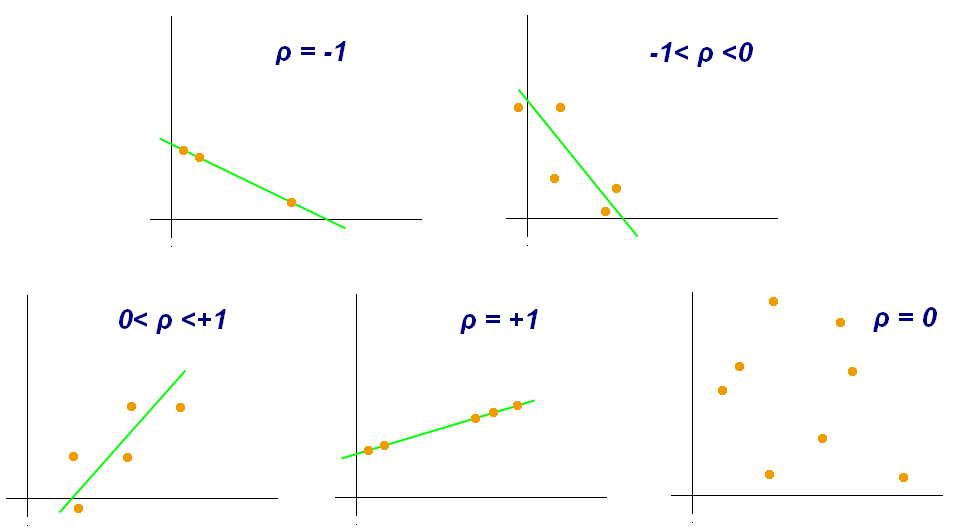

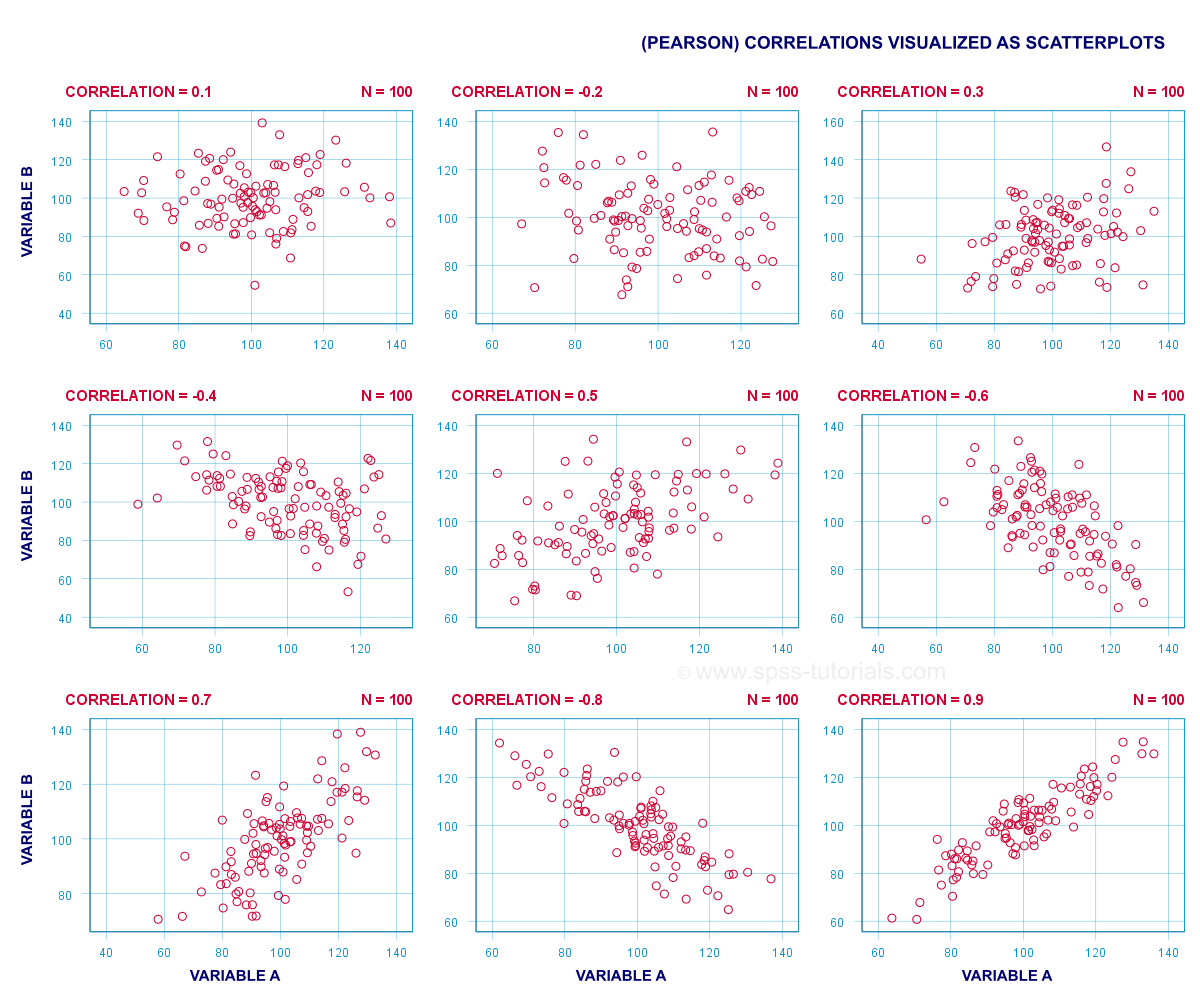

The `corr()` methods offers the possibility to compute correlations according to different statistical estimators setting the named argument `method`.

- `pearson` : standard correlation coefficient, Pearson's method

- `kendall` : Kendall Tau correlation coefficient

- `spearman` : Spearman rank correlation

       AGE    SEX    BMI     BP    S1     S2     S3     S4     S5     S6  \
AGE  1.000  0.174  0.185  0.335 0.260  0.219 -0.075  0.204  0.271  0.302   
SEX  0.174  1.000  0.088  0.241 0.035  0.143 -0.379  0.332  0.150  0.208   
BMI  0.185  0.088  1.000  0.395 0.250  0.261 -0.367  0.414  0.446  0.389   
BP   0.335  0.241  0.395  1.000 0.242  0.186 -0.179  0.258  0.393  0.390   
S1   0.260  0.035  0.250  0.242 1.000  0.897  0.052  0.542  0.516  0.326   
S2   0.219  0.143  0.261  0.186 0.897  1.000 -0.196  0.660  0.318  0.291   
S3  -0.075 -0.379 -0.367 -0.179 0.052 -0.196  1.000 -0.738 -0.399 -0.274   
S4   0.204  0.332  0.414  0.258 0.542  0.660 -0.738  1.000  0.618  0.417   
S5   0.271  0.150  0.446  0.393 0.516  0.318 -0.399  0.618  1.000  0.465   
S6   0.302  0.208  0.389  0.390 0.326  0.291 -0.274  0.417  0.465  1.000   
Y    0.188  0.043  0.586  0.441 0.212  0.174 -0.395  0.430  0.566  0.382   

         Y  
AGE  0.188  
SEX  0.043  
BMI  0.586  
BP   0.441  
S1   0.212  
S2   0.17

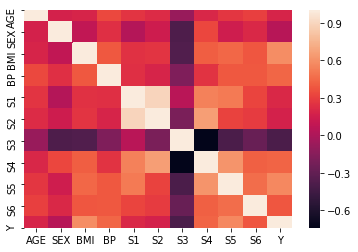

In [67]:
import seaborn as sns

corr = diabetes_orig.corr()
print(corr)
sns.heatmap(corr, 
             xticklabels=corr.columns, 
             yticklabels=corr.columns)


                     age    sex    bmi     bp    s1     s2     s3     s4  \
age                1.000  0.174  0.185  0.335 0.260  0.219 -0.075  0.204   
sex                0.174  1.000  0.088  0.241 0.035  0.143 -0.379  0.332   
bmi                0.185  0.088  1.000  0.395 0.250  0.261 -0.367  0.414   
bp                 0.335  0.241  0.395  1.000 0.242  0.186 -0.179  0.258   
s1                 0.260  0.035  0.250  0.242 1.000  0.897  0.052  0.542   
s2                 0.219  0.143  0.261  0.186 0.897  1.000 -0.196  0.660   
s3                -0.075 -0.379 -0.367 -0.179 0.052 -0.196  1.000 -0.738   
s4                 0.204  0.332  0.414  0.258 0.542  0.660 -0.738  1.000   
s5                 0.271  0.150  0.446  0.393 0.516  0.318 -0.399  0.618   
s6                 0.302  0.208  0.389  0.390 0.326  0.291 -0.274  0.417   
Progression index  0.188  0.043  0.586  0.441 0.212  0.174 -0.395  0.430   

                      s5     s6  Progression index  
age                0.271  0.302   

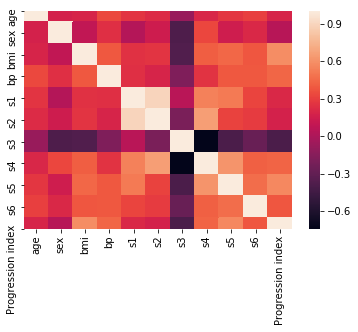

In [68]:
corr = diabetes_df.corr()
print(corr)
sns.heatmap(corr, 
             xticklabels=corr.columns, 
             yticklabels=corr.columns)

We can get a lot of information from the correlation matrix and the visual heatmap representation. 

The **correlation between each feature and the target values** are particularly important to identify redundant features.

**If two features are highly correlated,** one can be likely removed without affecting the ML performance since they are predictors of each other.